In [47]:
pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
df = pd.read_csv('breach_report2.csv')

In [2]:
df

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,PCC Pediatric EHR Solutions,VT,Business Associate,520.0,08/09/2023,Unauthorized Access/Disclosure,Email,Yes,"The business associate (BA), PCC Pediatric EHR..."
1,Recovery Centers of America,PA,Healthcare Provider,2220.0,06/30/2023,Hacking/IT Incident,Network Server,No,"The covered entity (CE), Recovery Centers of A..."
2,University of Pittsburgh Medical Center,PA,Healthcare Provider,1533.0,06/26/2023,Hacking/IT Incident,Network Server,Yes,"The covered entity (CE), University of Pittsbu..."
3,The MetroHealth System,OH,Healthcare Provider,1230.0,06/23/2023,Unauthorized Access/Disclosure,Electronic Medical Record,No,"The covered entity (CE), The MetroHealth Syste..."
4,SEVA Medical Group LLC,VA,Healthcare Provider,690.0,06/19/2023,Unauthorized Access/Disclosure,Email,No,"The covered entity (CE), SEVA Medical Group, r..."
...,...,...,...,...,...,...,...,...,...
4746,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,11/20/2009,Theft,Desktop Computer,No,A shared Computer that was used for backup was...
4747,Health Services for Children with Special Need...,DC,Health Plan,3800.0,11/17/2009,Loss,Laptop,No,A laptop was lost by an employee while in tran...
4748,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,10/30/2009,Theft,"Other, Other Portable Electronic Device",No,The Alaska Department of Health and Social Ser...
4749,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,10/28/2009,Theft,Network Server,No,Five desktop computers containing unencrypted ...


In [3]:
df.isnull().sum()

Name of Covered Entity                0
State                                12
Covered Entity Type                   4
Individuals Affected                  1
Breach Submission Date                0
Type of Breach                        1
Location of Breached Information      0
Business Associate Present            0
Web Description                     283
dtype: int64

In [4]:
df.columns

Index(['Name of Covered Entity', 'State', 'Covered Entity Type',
       'Individuals Affected', 'Breach Submission Date', 'Type of Breach',
       'Location of Breached Information', 'Business Associate Present',
       'Web Description'],
      dtype='object')

In [5]:
print(df['State'].value_counts())

State
CA    496
TX    391
NY    296
FL    291
PA    208
IL    201
OH    159
GA    142
MI    133
MA    125
MN    123
WA    117
NC    115
IN    114
MD    109
TN    107
AZ    103
MO    103
VA     96
CO     92
CT     88
NJ     88
KY     82
WI     76
OR     72
IA     65
AR     60
AL     57
SC     55
OK     44
NM     43
LA     40
NV     39
UT     37
NE     34
KS     34
PR     32
WV     31
MS     30
MT     23
RI     23
DC     22
DE     20
AK     19
ME     17
HI     15
WY     14
NH     14
VT     13
ID     12
SD     10
ND      9
Name: count, dtype: int64


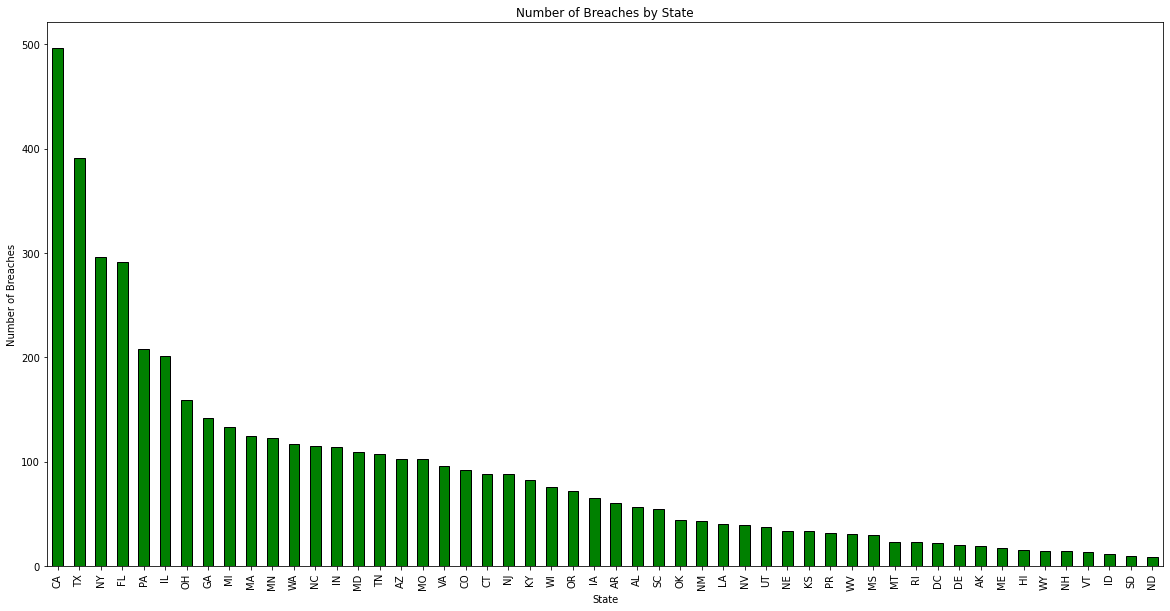

In [6]:
#Number of Breaches by State:

import matplotlib.pyplot as plt
state_counts = df['State'].value_counts()

plt.figure(figsize=(20, 10))
state_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('Number of Breaches by State')
plt.xlabel('State')
plt.ylabel('Number of Breaches')
plt.show()

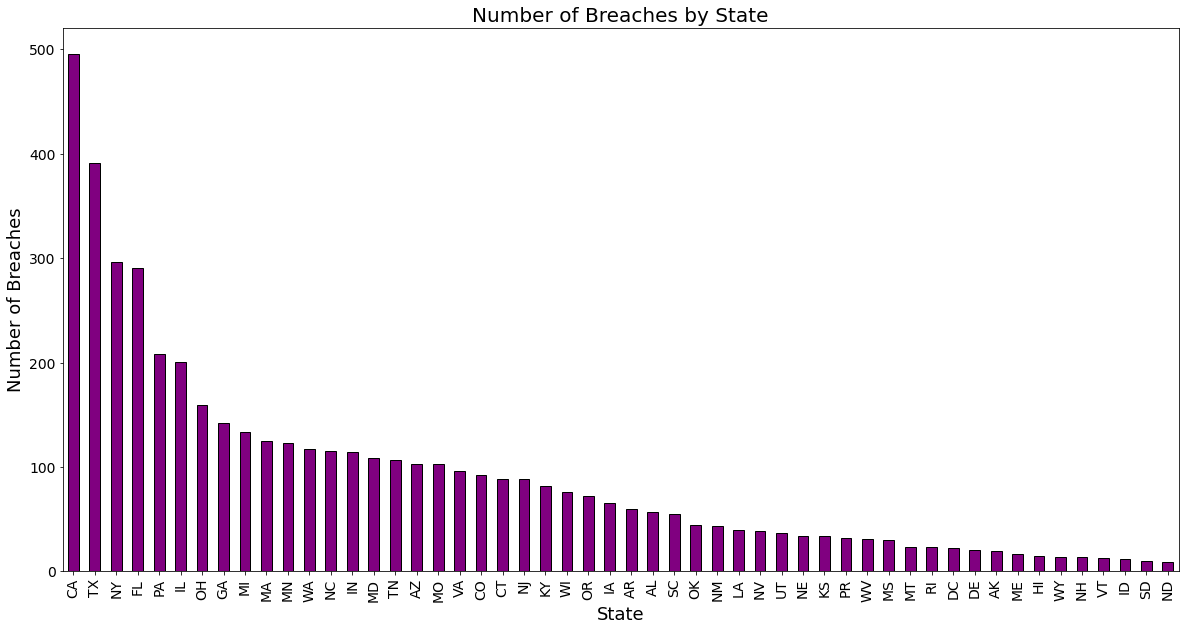

In [10]:
import matplotlib.pyplot as plt
state_counts = df['State'].value_counts()

plt.figure(figsize=(20, 10))
state_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Number of Breaches by State', fontsize=20)  # Increased title font size
plt.xlabel('State', fontsize=18)  # Increased x-axis label font size
plt.ylabel('Number of Breaches', fontsize=18)  # Increased y-axis label font size
plt.xticks(fontsize=14)  # Increase x-axis tick labels font size
plt.yticks(fontsize=14)  # Increase y-axis tick labels font size
plt.show()


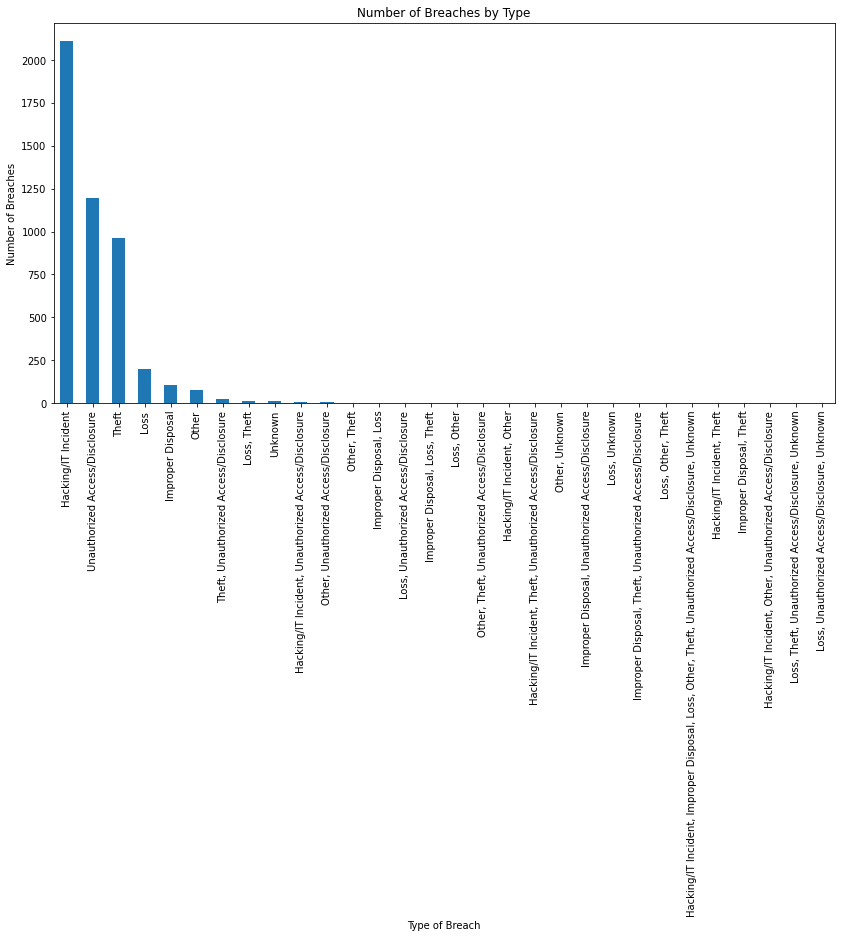

In [11]:
#Number of Breaches by Type:

breach_type_counts = df['Type of Breach'].value_counts()
breach_type_counts.plot(kind='bar', figsize=(14,7))
plt.title('Number of Breaches by Type')
plt.xlabel('Type of Breach')
plt.ylabel('Number of Breaches')
plt.show()

In [12]:
import plotly.graph_objects as go
from shapely.geometry import shape, Point

# Retrieve US states geometries from Plotly Express
us_states_geojson = px.data.us_states()

# Compute centroids for each state
state_centroids = {}
for feature in us_states_geojson["features"]:
    state_code = feature["id"]
    geometry = shape(feature["geometry"])
    centroid = geometry.centroid
    state_centroids[state_code] = {"lon": centroid.x, "lat": centroid.y}

# Filter out states not in our dataset
relevant_centroids = {state: state_centroids[state] for state in df["State"] if state in state_centroids}

# Overlay state names on the choropleth map
scatter = go.Scattergeo(
    lon=[coords["lon"] for state, coords in relevant_centroids.items()],
    lat=[coords["lat"] for state, coords in relevant_centroids.items()],
    text=list(relevant_centroids.keys()),
    mode="text",
)

# Update the figure with the scatter plot
fig.add_trace(scatter)
fig.show()


ModuleNotFoundError: No module named 'shapely'

In [13]:
# Predefined state centroids (latitude and longitude values for the center of each state)
state_centroids = {
    "AK": {"lat": 63.588753, "lon": -154.493062},
    "AL": {"lat": 32.318231, "lon": -86.902298},
    "AR": {"lat": 35.20105, "lon": -91.831833},
    "AZ": {"lat": 34.048928, "lon": -111.093731},
    "CA": {"lat": 36.778261, "lon": -119.417932},
    "CO": {"lat": 39.550051, "lon": -105.782067},
    "CT": {"lat": 41.603221, "lon": -73.087749},
    "DC": {"lat": 38.905985, "lon": -77.033418},
    "DE": {"lat": 38.910832, "lon": -75.52767},
    "FL": {"lat": 27.994402, "lon": -81.760254},
    "GA": {"lat": 32.157435, "lon": -82.907123},
    "HI": {"lat": 19.898682, "lon": -155.665857},
    "IA": {"lat": 41.878003, "lon": -93.097702},
    "ID": {"lat": 44.068202, "lon": -114.742041},
    "IL": {"lat": 40.633125, "lon": -89.398528},
    "IN": {"lat": 40.551217, "lon": -85.602364},
    "KS": {"lat": 39.011902, "lon": -98.484246},
    "KY": {"lat": 37.839333, "lon": -84.270018},
    "LA": {"lat": 31.244823, "lon": -92.145024},
    "MA": {"lat": 42.407211, "lon": -71.382437},
    "MD": {"lat": 39.045755, "lon": -76.641271},
    "ME": {"lat": 45.253783, "lon": -69.445469},
    "MI": {"lat": 44.314844, "lon": -85.602364},
    "MN": {"lat": 46.729553, "lon": -94.6859},
    "MO": {"lat": 37.964253, "lon": -91.831833},
    "MS": {"lat": 32.354668, "lon": -89.398528},
    "MT": {"lat": 46.879682, "lon": -110.362566},
    "NC": {"lat": 35.759573, "lon": -79.0193},
    "ND": {"lat": 47.551493, "lon": -101.002012},
    "NE": {"lat": 41.492537, "lon": -99.901813},
    "NH": {"lat": 43.193852, "lon": -71.572395},
    "NJ": {"lat": 40.058324, "lon": -74.405661},
    "NM": {"lat": 34.97273, "lon": -105.032363},
    "NV": {"lat": 38.80261, "lon": -116.419389},
    "NY": {"lat": 43.299428, "lon": -74.217933},
    "OH": {"lat": 40.417287, "lon": -82.907123},
    "OK": {"lat": 35.007752, "lon": -97.092877},
    "OR": {"lat": 43.804133, "lon": -120.554201},
    "PA": {"lat": 41.203322, "lon": -77.194525},
    "PR": {"lat": 18.220833, "lon": -66.590149},
    "RI": {"lat": 41.580095, "lon": -71.477429},
    "SC": {"lat": 33.836081, "lon": -81.163725},
    "SD": {"lat": 43.969515, "lon": -99.901813},
    "TN": {"lat": 35.517491, "lon": -86.580447},
    "TX": {"lat": 31.968599, "lon": -99.901813},
    "UT": {"lat": 39.32098, "lon": -111.093731},
    "VA": {"lat": 37.431573, "lon": -78.656894},
    "VT": {"lat": 44.558803, "lon": -72.577841},
    "WA": {"lat": 47.751074, "lon": -120.740139},
    "WI": {"lat": 43.78444, "lon": -88.787868},
    "WV": {"lat": 38.597626, "lon": -80.454903},
    "WY": {"lat": 43.076, "lon": -107.2903}
}

# Filter for states in our dataset
relevant_centroids = {state: state_centroids[state] for state in df["State"] if state in state_centroids}

# Overlay state names on the choropleth map
scatter = go.Scattergeo(
    lon=[coords["lon"] for state, coords in relevant_centroids.items()],
    lat=[coords["lat"] for state, coords in relevant_centroids.items()],
    text=list(relevant_centroids.keys()),
    mode="text",
)

# Update the figure with the scatter plot
fig.add_trace(scatter)
fig.show()


NameError: name 'fig' is not defined

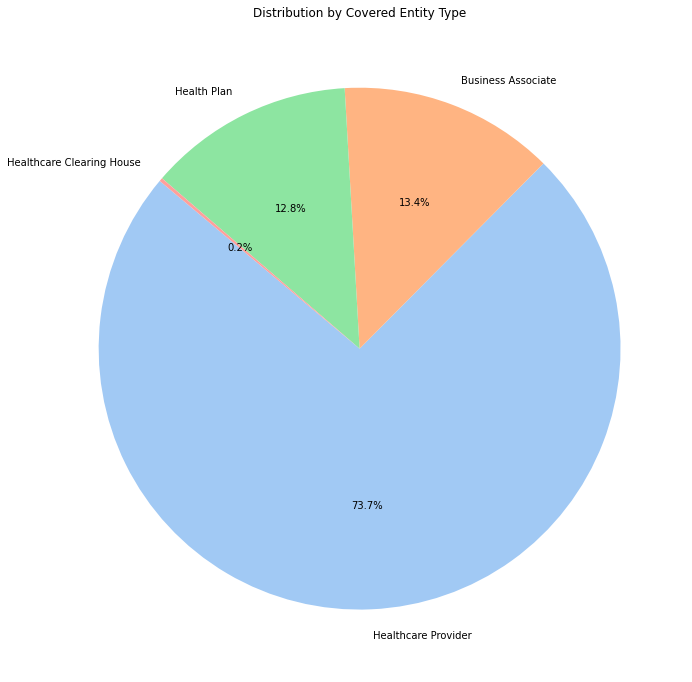

In [14]:
import seaborn as sns
entity_counts = df['Covered Entity Type'].value_counts()

plt.figure(figsize=(20, 12))
entity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution by Covered Entity Type')
plt.ylabel('')
plt.show()

In [15]:
scatter = go.Scattergeo(
    lon=[coords["lon"] for state, coords in relevant_centroids.items()],
    lat=[coords["lat"] for state, coords in relevant_centroids.items()],
    text=list(relevant_centroids.keys()),
    mode="text",
    textfont=dict(color="white")  # Change color to white
)

# Update the figure with the scatter plot
fig.add_trace(scatter)
fig.show()


NameError: name 'fig' is not defined

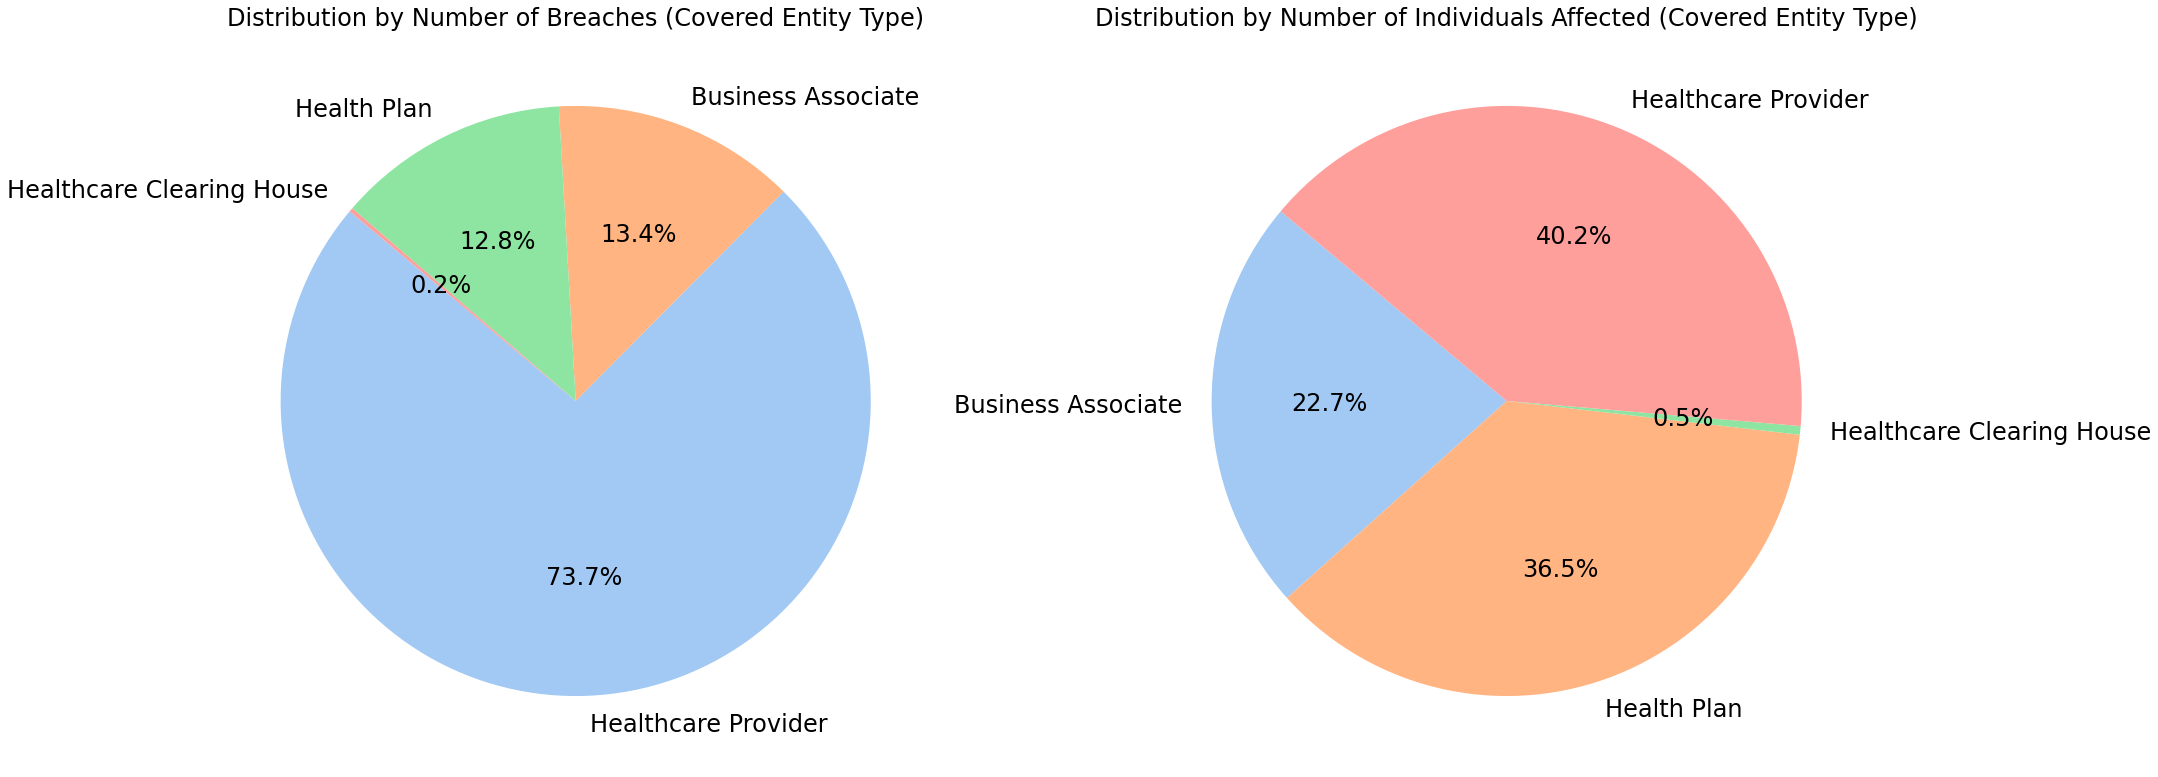

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

entity_breach_counts = df['Covered Entity Type'].value_counts()
entity_affected_counts = df.groupby('Covered Entity Type')['Individuals Affected'].sum()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 20))

text_properties = {'fontsize': 24}

# Number of breaches by Covered Entity Type
ax[0].pie(entity_breach_counts, labels=entity_breach_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), textprops=text_properties)
ax[0].set_title('Distribution by Number of Breaches (Covered Entity Type)', fontsize=24)

# Number of individuals affected by Covered Entity Type
ax[1].pie(entity_affected_counts, labels=entity_affected_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), textprops=text_properties)
ax[1].set_title('Distribution by Number of Individuals Affected (Covered Entity Type)', fontsize=24)

plt.tight_layout()
plt.show()


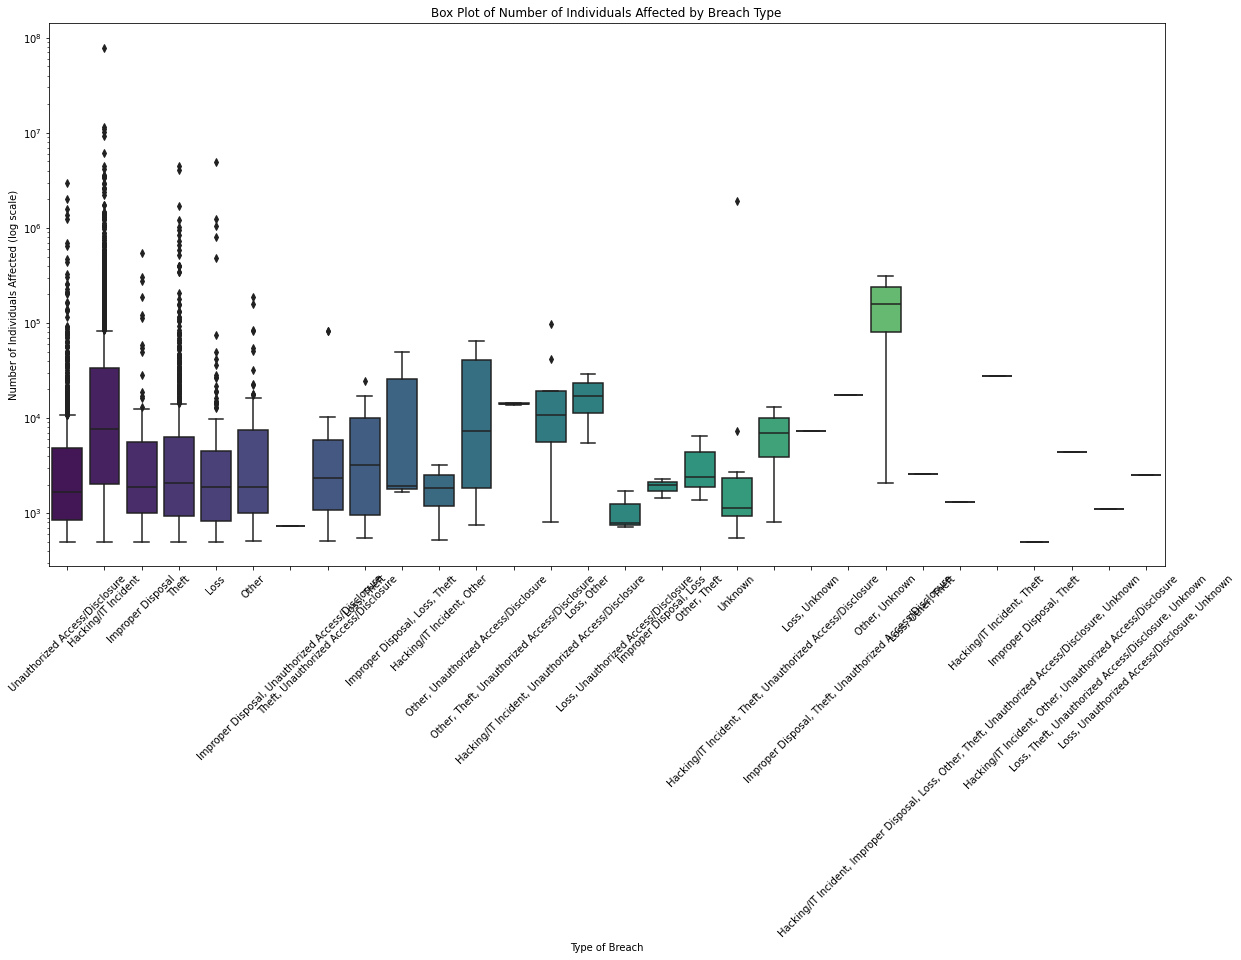

In [17]:
# Box plot for 'Individuals Affected' by 'Type of Breach'

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.boxplot(x='Type of Breach', y='Individuals Affected', data=df, palette='viridis')
plt.yscale('log')
plt.title('Box Plot of Number of Individuals Affected by Breach Type')
plt.ylabel('Number of Individuals Affected (log scale)')
plt.xticks(rotation=45)
plt.show()

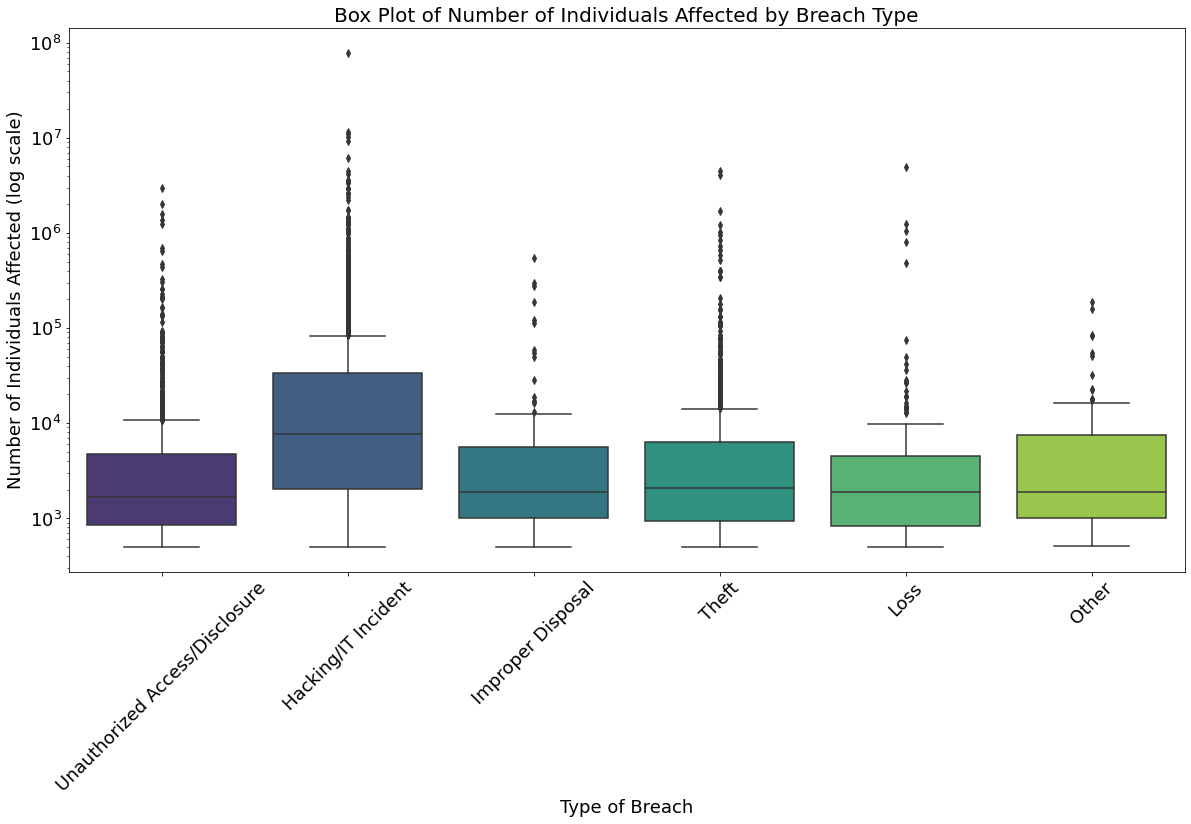

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find the top 6 breach types based on the count of their occurrences
top_breaches = df['Type of Breach'].value_counts().nlargest(6).index

# Filter the data to only include rows corresponding to the top 6 breach types
filtered_df = df[df['Type of Breach'].isin(top_breaches)]

plt.figure(figsize=(20, 10))
sns.boxplot(x='Type of Breach', y='Individuals Affected', data=filtered_df, palette='viridis')
plt.yscale('log')

# Increase font size of the title, x-axis label, y-axis label, and tick labels
plt.title('Box Plot of Number of Individuals Affected by Breach Type', fontsize=20)
plt.ylabel('Number of Individuals Affected (log scale)', fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Type of Breach', fontsize=18)
plt.tick_params(axis='both', labelsize=18)  # This adjusts the size of the tick labels

plt.show()

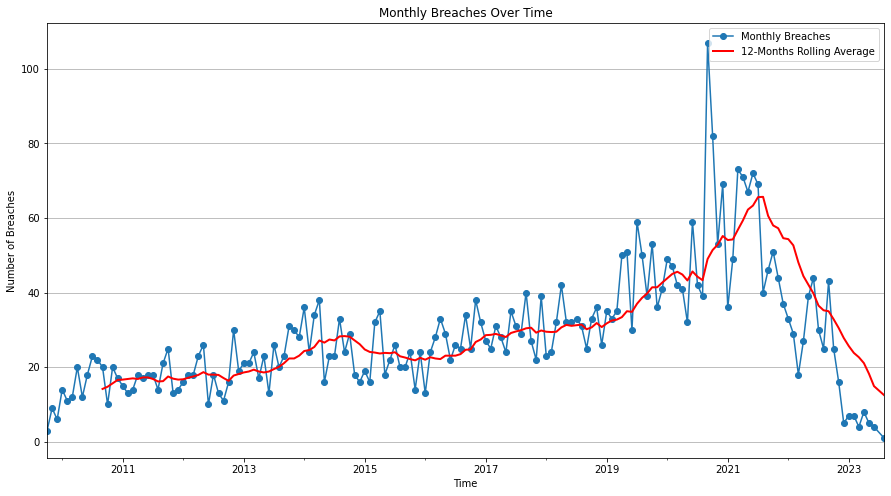

In [19]:
# To see the trend of Breaches- With trend line
df['Breach Submission Date'] = pd.to_datetime(df['Breach Submission Date'])

df['Year-Month'] = df['Breach Submission Date'].dt.to_period('M')
monthly_breaches = df.groupby('Year-Month').size()

plt.figure(figsize=(15, 8))
monthly_breaches.plot(label='Monthly Breaches', marker='o')

monthly_breaches.rolling(window=12).mean().plot(color='red', linewidth=2, label='12-Months Rolling Average')

plt.title('Monthly Breaches Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Breaches')
plt.legend()
plt.grid(True, axis='y')
plt.show()

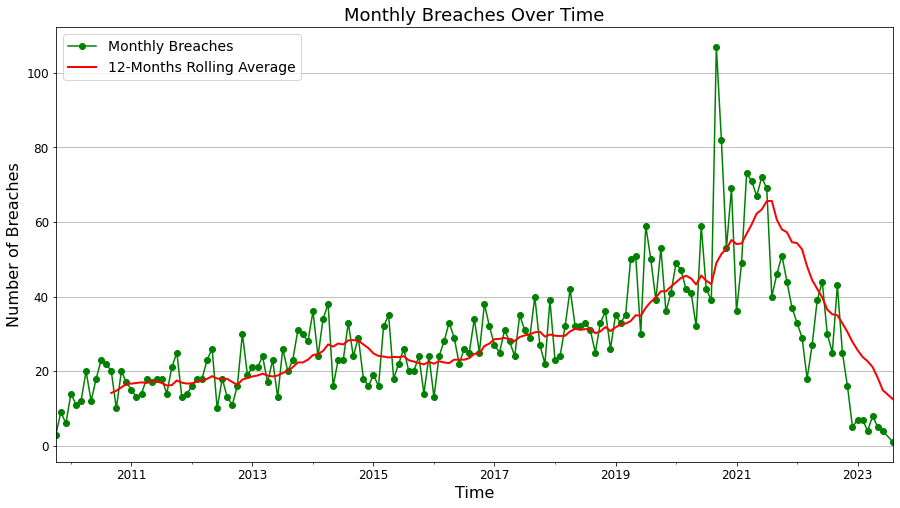

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming that 'df' is already defined and contains the relevant data
df['Breach Submission Date'] = pd.to_datetime(df['Breach Submission Date'])
df['Year-Month'] = df['Breach Submission Date'].dt.to_period('M')
monthly_breaches = df.groupby('Year-Month').size()

plt.figure(figsize=(15, 8))
monthly_breaches.plot(label='Monthly Breaches', color='green',marker='o')

monthly_breaches.rolling(window=12).mean().plot(color='red', linewidth=2, label='12-Months Rolling Average')

plt.title('Monthly Breaches Over Time', fontsize=18)  # Increased title font size
plt.xlabel('Time', fontsize=16)  # Increased x-axis label font size
plt.ylabel('Number of Breaches', fontsize=16)  # Increased y-axis label font size
plt.xticks(fontsize=12)  # Increase x-axis tick labels font size
plt.yticks(fontsize=12)  # Increase y-axis tick labels font size
plt.legend(fontsize=14)  # Increase legend font size
plt.grid(True, axis='y')
plt.show()


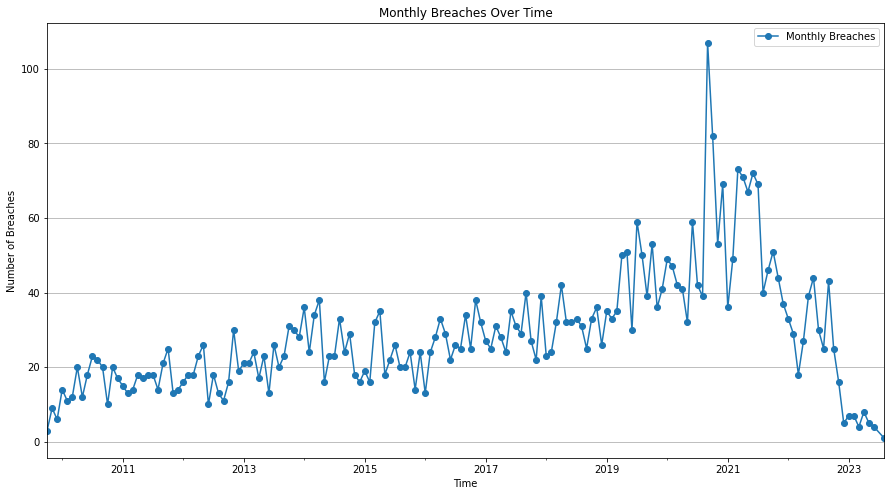

In [21]:
# To see the trend of Breaches- Without trend line
df['Breach Submission Date'] = pd.to_datetime(df['Breach Submission Date'])

df['Year-Month'] = df['Breach Submission Date'].dt.to_period('M')
monthly_breaches = df.groupby('Year-Month').size()

plt.figure(figsize=(15, 8))
monthly_breaches.plot(label='Monthly Breaches', marker='o')

plt.title('Monthly Breaches Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Breaches')
plt.legend()
plt.grid(True, axis='y')
plt.show()

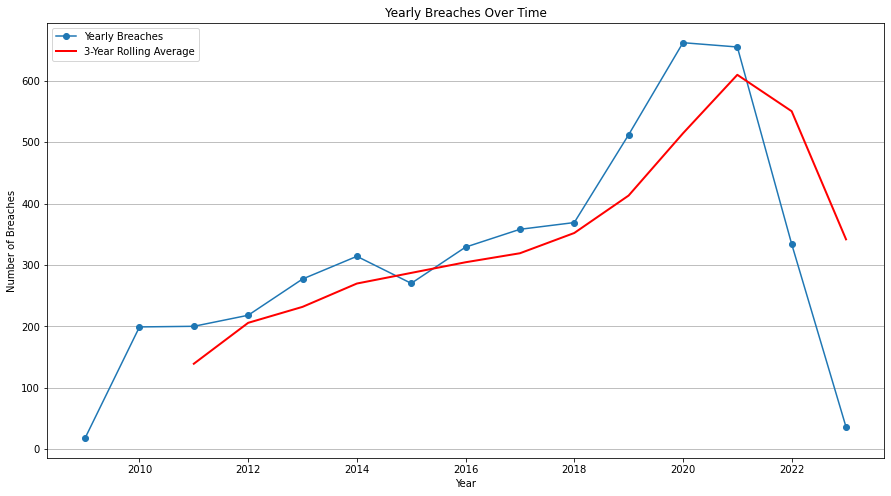

In [22]:
# To see yearly trend of Breaches-

df['Breach Submission Date'] = pd.to_datetime(df['Breach Submission Date'])

df['Year'] = df['Breach Submission Date'].dt.year
yearly_breaches = df.groupby('Year').size()

plt.figure(figsize=(15, 8))
yearly_breaches.plot(label='Yearly Breaches', marker='o', linestyle='-')

yearly_breaches.rolling(window=3).mean().plot(color='red', linewidth=2, label='3-Year Rolling Average')

plt.title('Yearly Breaches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.legend()
plt.grid(True, axis='y')
plt.show()


In [20]:
import pandas as pd

# Load the data from the CSV file
breach_data = pd.read_csv('breach_report2.csv')

# Display the first few rows of the data to understand its structure
breach_data.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,PCC Pediatric EHR Solutions,VT,Business Associate,520.0,08/09/2023,Unauthorized Access/Disclosure,Email,Yes,"The business associate (BA), PCC Pediatric EHR..."
1,Recovery Centers of America,PA,Healthcare Provider,2220.0,06/30/2023,Hacking/IT Incident,Network Server,No,"The covered entity (CE), Recovery Centers of A..."
2,University of Pittsburgh Medical Center,PA,Healthcare Provider,1533.0,06/26/2023,Hacking/IT Incident,Network Server,Yes,"The covered entity (CE), University of Pittsbu..."
3,The MetroHealth System,OH,Healthcare Provider,1230.0,06/23/2023,Unauthorized Access/Disclosure,Electronic Medical Record,No,"The covered entity (CE), The MetroHealth Syste..."
4,SEVA Medical Group LLC,VA,Healthcare Provider,690.0,06/19/2023,Unauthorized Access/Disclosure,Email,No,"The covered entity (CE), SEVA Medical Group, r..."


In [21]:
# Aggregate data by state to count the number of breaches
breaches_per_state = breach_data.groupby('State').size().reset_index(name='Number of Breaches')

breaches_per_state.head()


,State,Number of Breaches
0,AK,19
1,AL,57
2,AR,60
3,AZ,103
4,CA,496
